In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function (we want to minimize this)
def objective_function(x):
    return x[0]**2 + x[1]**2  # Simple paraboloid

# Generate a random antibody (solution)
def random_antibody(bounds):
    return np.random.uniform(bounds[0], bounds[1], 2)

# Mutate an antibody (small change)
def mutate(antibody, mutation_rate, bounds):
    mutation = antibody + np.random.normal(0, mutation_rate, size=2)
    return np.clip(mutation, bounds[0], bounds[1])

# Main Clonal Selection Algorithm
def clonal_selection(objective_function, bounds, n_population=20, n_generations=20, n_clones=5, mutation_rate=0.1):
    population = [random_antibody(bounds) for _ in range(n_population)]
    history = []
    best_scores = []

    print("=== Clonal Selection Algorithm Theoretical Output ===\n")

    for gen in range(n_generations):
        fitness = np.array([objective_function(p) for p in population])
        sorted_indices = np.argsort(fitness)
        population = [population[i] for i in sorted_indices]
        best = population[0]
        best_fitness = fitness[sorted_indices[0]]
        avg_fitness = np.mean(fitness)

        # Print theoretical output
        print(f"Generation {gen+1:02d}:")
        print(f" Best Antibody: {best}")
        print(f" Best Fitness : {best_fitness:.4f}")
        print(f" Avg Fitness  : {avg_fitness:.4f}\n")

        history.append(population)
        best_scores.append(best_fitness)

        # Clone and mutate
        new_population = []
        for i in range(n_population):
            for _ in range(n_clones):
                clone = mutate(population[i], mutation_rate, bounds)
                new_population.append(clone)

        new_fitness = np.array([objective_function(p) for p in new_population])
        best_indices = np.argsort(new_fitness)[:n_population]
        population = [new_population[i] for i in best_indices]

    return history, best_scores

# Define bounds before calling clonal_selection
bounds = [-5, 5]

history, best_scores = clonal_selection(objective_function, bounds, n_population=15, n_generations=20, n_clones=5, mutation_rate=0.2)


=== Clonal Selection Algorithm Theoretical Output ===

Generation 01:
 Best Antibody: [-0.65964782  0.50929101]
 Best Fitness : 0.6945
 Avg Fitness  : 11.9721

Generation 02:
 Best Antibody: [-0.55506485  0.47529689]
 Best Fitness : 0.5340
 Avg Fitness  : 2.9148

Generation 03:
 Best Antibody: [-0.32367353  0.15741244]
 Best Fitness : 0.1295
 Avg Fitness  : 0.6658

Generation 04:
 Best Antibody: [-0.21015277 -0.03885597]
 Best Fitness : 0.0457
 Avg Fitness  : 0.2319

Generation 05:
 Best Antibody: [-0.02430378 -0.0165904 ]
 Best Fitness : 0.0009
 Avg Fitness  : 0.0439

Generation 06:
 Best Antibody: [ 0.00381621 -0.0202468 ]
 Best Fitness : 0.0004
 Avg Fitness  : 0.0115

Generation 07:
 Best Antibody: [-0.02505087  0.01863305]
 Best Fitness : 0.0010
 Avg Fitness  : 0.0115

Generation 08:
 Best Antibody: [ 0.02165125 -0.01042836]
 Best Fitness : 0.0006
 Avg Fitness  : 0.0086

Generation 09:
 Best Antibody: [-0.00890213 -0.01311771]
 Best Fitness : 0.0003
 Avg Fitness  : 0.0100

Generati

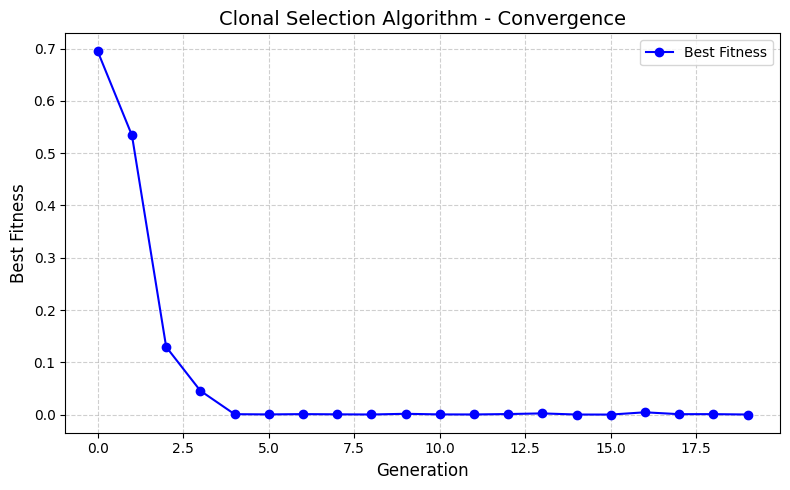

In [3]:

# Plot convergence graph
def plot_convergence(best_scores):
    plt.figure(figsize=(8, 5))
    plt.plot(best_scores, marker='o', linestyle='-', color='blue', label='Best Fitness')
    plt.title("Clonal Selection Algorithm - Convergence", fontsize=14)
    plt.xlabel("Generation", fontsize=12)
    plt.ylabel("Best Fitness", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()


plot_convergence(best_scores)